# Zadanie: Baza Filmów

## Wczytywanie Danych

In [24]:
import pandas as pd

movies_url = 'https://raw.githubusercontent.com/konradp-86/kurs/main/tmdb_movies.csv'
genres_url = 'https://raw.githubusercontent.com/konradp-86/kurs/main/tmdb_genres.csv'

movies = pd.read_csv(movies_url)
genres = pd.read_csv(genres_url)

print(movies.head(10))
print(genres.head(10))



   Unnamed: 0     budget                                           homepage  \
0           0  237000000                        http://www.avatarmovie.com/   
1           1  300000000       http://disney.go.com/disneypictures/pirates/   
2           2  245000000        http://www.sonypictures.com/movies/spectre/   
3           3  250000000                 http://www.thedarkknightrises.com/   
4           4  260000000               http://movies.disney.com/john-carter   
5           5  258000000    http://www.sonypictures.com/movies/spider-man3/   
6           6  260000000       http://disney.go.com/disneypictures/tangled/   
7           7  280000000  http://marvel.com/movies/movie/193/avengers_ag...   
8           8  250000000  http://harrypotter.warnerbros.com/harrypottera...   
9           9  250000000       http://www.batmanvsupermandawnofjustice.com/   

       id original_language                            original_title  \
0   19995                en                              

## Lista 10 najlepiej ocenianych 

In [25]:
próg_głosów = movies['vote_count'].quantile(0.75)

najlepsze_filmy = movies[movies['vote_count'] > próg_głosów].sort_values(by='vote_average', ascending=False)

top_10_filmów = najlepsze_filmy[['title', 'vote_average', 'vote_count']].head(10)
print(top_10_filmów)


                            title  vote_average  vote_count
1881     The Shawshank Redemption           8.5        8205
3337                The Godfather           8.4        5893
662                    Fight Club           8.3        9413
2731       The Godfather: Part II           8.3        3338
3232                 Pulp Fiction           8.3        8428
2294                Spirited Away           8.3        3840
1818             Schindler's List           8.3        4329
3865                     Whiplash           8.3        4254
1663  Once Upon a Time in America           8.2        1069
1847                   GoodFellas           8.2        3128


## Średni przychód i budżet w latach 2010 - 2016

C:\Users\Gosia\AppData\Local\Temp\ipykernel_29076\2195197467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmy_2010_2016.loc[:, 'rok'] = pd.to_datetime(filmy_2010_2016['release_date']).dt.year


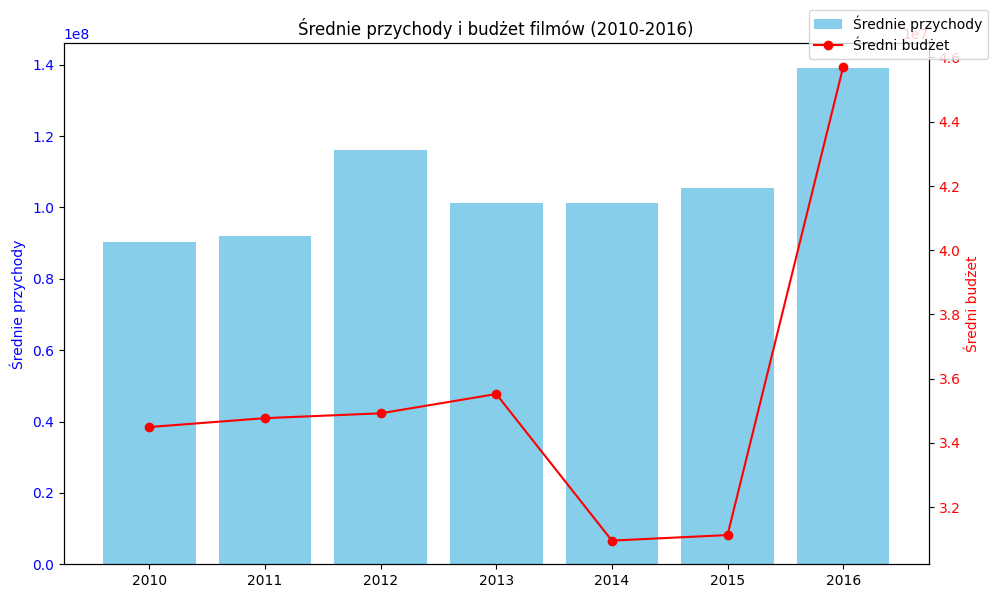

In [27]:
import matplotlib.pyplot as plt

filmy_2010_2016 = movies[(movies['release_date'] >= '2010-01-01') & (movies['release_date'] <= '2016-12-31')]

filmy_2010_2016.loc[:, 'rok'] = pd.to_datetime(filmy_2010_2016['release_date']).dt.year

średnie_dane = filmy_2010_2016.groupby('rok')[['revenue', 'budget']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(średnie_dane['rok'], średnie_dane['revenue'], color='skyblue', label='Średnie przychody')
ax1.set_ylabel('Średnie przychody', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(średnie_dane['rok'], średnie_dane['budget'], color='red', marker='o', label='Średni budżet')
ax2.set_ylabel('Średni budżet', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(średnie_dane['rok'])
plt.title('Średnie przychody i budżet filmów (2010-2016)')

fig.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


## Łączenie tabel na podstawie kolumny Gatunek

In [28]:
filmy_gatunki = pd.merge(movies, genres, how='left', left_on='genre_id', right_on='Unnamed: 0')
print(filmy_gatunki[['title', 'genre_id', 'genres']].head())

                                      title  genre_id     genres
0                                    Avatar      28.0     Action
1  Pirates of the Caribbean: At World's End      12.0  Adventure
2                                   Spectre      28.0     Action
3                     The Dark Knight Rises      28.0     Action
4                               John Carter      28.0     Action


## Najwięcej filmów z jednego gatunku

In [30]:
liczba_filmów_w_gatunku = filmy_gatunki['genres'].value_counts()

najczęstszy_gatunek = liczba_filmów_w_gatunku.idxmax()
liczba_filmów = liczba_filmów_w_gatunku.max()

print(f"Najczęstszy gatunek filmów: {najczęstszy_gatunek} ({liczba_filmów} filmów)")


Najczęstszy gatunek filmów: Drama (1207 filmów)


## Gatunek filmów z najdłuższym średnim czasem trwania

In [31]:
średni_czas_trwania = filmy_z_gatunkami.groupby('genres')['runtime'].mean().sort_values(ascending=False)

gatunek_najdłuższy = średni_czas_trwania.idxmax()
średni_runtime = średni_czas_trwania.max()

print(f"Gatunek z najdłuższym średnim czasem trwania: {gatunek_najdłuższy} (średnio {średni_runtime:.2f} minut)")


Gatunek z najdłuższym średnim czasem trwania: History (średnio 133.96 minut)


## Histogram czasu trwania filmów 

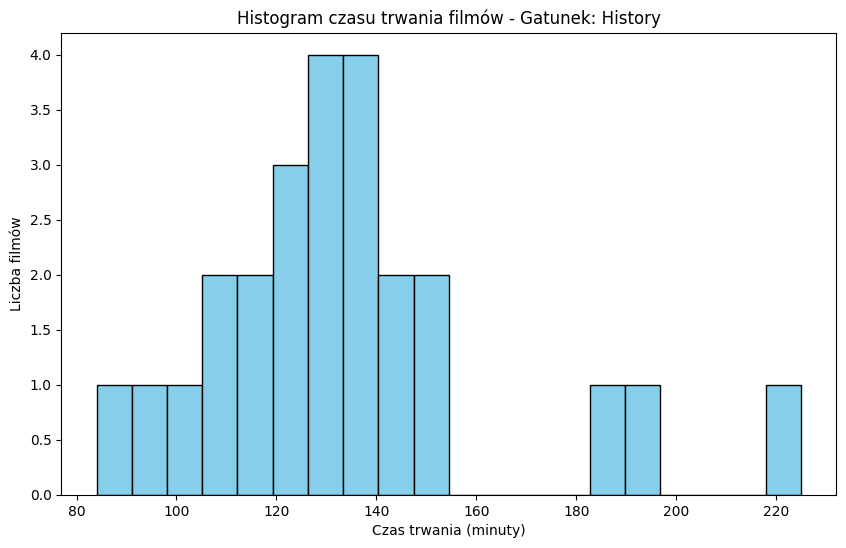

In [32]:
filmy_najdłuższy_gatunek = filmy_z_gatunkami[filmy_z_gatunkami['genres'] == gatunek_najdłuższy]

plt.figure(figsize=(10, 6))
plt.hist(filmy_najdłuższy_gatunek['runtime'].dropna(), bins=20, color='skyblue', edgecolor='black')

plt.title(f'Histogram czasu trwania filmów - Gatunek: {gatunek_najdłuższy}')
plt.xlabel('Czas trwania (minuty)')
plt.ylabel('Liczba filmów')

plt.show()
